# PhonePay Digital Payments Case Study

#### This case study involves analyzing transactional data from the financial application PhonePay along with demographic data across various states and districts in India.
#### The Objective is to proive insights into transaction trends, device usage, and demographic correlations, while ensuring data consistency and performing advanced analyses to uncover deeper insights.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.2f}'.format

# 1.1 load each Dataset and display its structure

## 1.load the State_Txn_and_Users dataset and display its first 5 rows

In [3]:
State_Txn_and_Users = pd.read_excel('Data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'State_Txn and Users')
State_Txn_and_Users.head(5)

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761.22,2197.62,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535.51,2498.99,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471.13,3415.77,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336.07,3811.28,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740.67,3355.63,18596,0


## 2.load the State_TxnSplit dataset and display its bottom 10 rows

In [4]:
State_TxnSplit = pd.read_excel('Data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'State_TxnSplit')
State_TxnSplit.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,202240249482.85,3754.29
2505,West Bengal,2021,1,Merchant payments,37143701,28918343691.02,778.55
2506,West Bengal,2021,1,Recharge & bill payments,26673733,11339665944.69,425.12
2507,West Bengal,2021,1,Financial Services,166727,175445811.88,1052.29
2508,West Bengal,2021,1,Others,400816,263502545.07,657.42
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,230812278789.30,3569.57
2510,West Bengal,2021,2,Merchant payments,41696787,34787867208.32,834.31
2511,West Bengal,2021,2,Recharge & bill payments,34799709,13331453857.61,383.09
2512,West Bengal,2021,2,Financial Services,190537,186466487.63,978.64
2513,West Bengal,2021,2,Others,549353,316744715.70,576.58


## 3.load the State_DeviceData dataset and display 10 rows from the middle of the datasaet`

In [5]:
State_DeviceData = pd.read_excel('Data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'State_DeviceData')
State_DeviceData.shape

(5544, 6)

In [6]:
middle_index = len(State_DeviceData)//2
middle_index

2772

In [7]:
start = middle_index - 5
end = middle_index + 5
start
end
State_DeviceData.iloc[start:end] #displaying the middle 10 rows

2767

2777

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.02
2768,Ladakh,2021,2,Motorola,922,0.01
2769,Ladakh,2021,2,Huawei,894,0.01
2770,Ladakh,2021,2,Lenovo,490,0.01
2771,Ladakh,2021,2,Others,2610,0.03
2772,Lakshadweep,2018,1,Samsung,102,0.20
2773,Lakshadweep,2018,1,Xiaomi,100,0.20
2774,Lakshadweep,2018,1,Vivo,67,0.13
2775,Lakshadweep,2018,1,Oppo,56,0.11
2776,Lakshadweep,2018,1,Huawei,25,0.05


In [8]:
# conerting value of percentage column in percentage 
State_DeviceData['Percentage'] = State_DeviceData['Percentage']*100

In [9]:
State_DeviceData 

,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,24.70
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,21.44
2,Andaman & Nicobar Islands,2018,1,Vivo,982,14.57
3,Andaman & Nicobar Islands,2018,1,Oppo,501,7.43
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,4.93
...,...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,350841,1.95
5540,West Bengal,2021,2,Asus,297579,1.66
5541,West Bengal,2021,2,Huawei,272965,1.52
5542,West Bengal,2021,2,Apple,201393,1.12


## 4.load the District_Txn_and_Users dataset and display its first 10 rows and last 10 rows 

In [10]:
District_Txn_and_Users = pd.read_excel('Data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'District_Txn and Users')
District_Txn_and_Users.head(10) #first 10 rows
District_Txn_and_Users.tail(10) #last 10 rows

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249.34,2208.20,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3072436.91,2743.25,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1317863.08,1597.41,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,23948235.52,2549.04,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6387829.15,4342.51,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4901529.52,3820.37,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,44268112.46,3276.45,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7180859.35,4835.60,536,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,19996935608.24,2324.62,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,11227582723.38,2032.45,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,30414821772.93,1762.33,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8731262893.73,1784.16,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,10303513378.80,2039.56,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7572502416.24,1931.40,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,15155067721.27,2361.15,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2790996372.04,1472.06,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,13398529483.67,2011.24,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5564220751.05,2469.27,392388,8184990


## 5.load the district demographics dataset and display every 10th row

In [11]:
District_Demographics = pd.read_excel('Data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name = 'District Demographics')
District_Demographics.loc[::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.00,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.00,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.00,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.00,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.00,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.00,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.00,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.00,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.00,14557,DL04,North


In [12]:
#pd.set_option('display.float_format', '{:.0f}'.format) #to convert scientific notation to float
# we used this here becuase if we run this command before loading the data then the percentage column value
# which are like 0.24,0.34,0.02 converted to zero and we got 0 in place of all values which leads to data loss
# so first we converted the percentage column values and then ran this command 

# 1.2 Display basic statistic and data types for each dataset

In [13]:
State_Txn_and_Users.describe()
State_Txn_and_Users.dtypes

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.00,504.00,504.00,503.00,504.00,504.00,504.00
mean,2019.29,2.36,40740000.58,70833320601.59,1993.47,4777500.89,97744705.23
std,1.03,1.11,82287143.49,144090233156.01,607.46,6644495.72,204237579.80
min,2018.00,1.00,778.00,1928611.18,0.00,501.00,0.00
25%,2018.00,1.00,592557.75,1167157028.93,1598.91,157420.25,0.00
50%,2019.00,2.00,6217487.00,10516054014.09,1861.38,1747914.00,2930573.50
75%,2020.00,3.00,43636745.50,69470450912.08,2259.09,7320945.25,86150218.25
max,2021.00,4.00,573616486.00,1027958332797.58,3938.73,39664697.00,1208083592.00


State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [14]:
State_TxnSplit.describe()
State_TxnSplit.dtypes

,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.00,2514.00,2514.00,2514.00,2514.00
mean,2019.29,2.36,8167446.42,14439779209.54,1349.93
std,1.03,1.11,24236453.68,59950544781.05,1534.87
min,2018.00,1.00,2.00,34.40,17.20
25%,2018.00,1.00,27880.75,17624121.73,385.74
50%,2019.00,2.00,268798.00,190118948.89,720.94
75%,2020.00,3.00,3683230.25,2661247757.00,1352.79
max,2021.00,4.00,279599017.00,872151973637.89,7767.54


State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [15]:
State_DeviceData.describe()
State_DeviceData.dtypes

,Year,Quarter,Registered Users,Percentage
count,5544.00,5544.00,5544.00,5544.00
mean,2019.29,2.36,434318.26,9.09
std,1.03,1.11,905606.95,8.31
min,2018.00,1.00,10.00,0.64
25%,2018.00,1.00,8055.75,2.16
50%,2019.00,2.00,74422.50,5.69
75%,2020.00,3.00,397887.50,14.36
max,2021.00,4.00,9764252.00,47.84


State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [16]:
District_Txn_and_Users.describe()
District_Txn_and_Users.dtypes

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.00,10248.00,10248.00,10248.00,10244.00,10248.00,10248.00
mean,2019.29,2.36,2003606.59,3542311176.11,1909.80,234959.06,4807116.65
std,1.03,1.11,9613466.29,14731537479.50,600.94,460597.83,15625414.80
min,2018.00,1.00,0.00,0.00,84.94,22.00,0.00
25%,2018.00,1.00,103141.75,175666805.61,1554.59,36195.50,0.00
50%,2019.00,2.00,376306.50,678456240.46,1863.14,106764.00,640302.50
75%,2020.00,3.00,1272815.00,2377255936.80,2203.08,257316.50,4346319.50
max,2021.00,4.00,348712787.00,444422398357.68,11209.98,10604609.00,554419656.00


State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [17]:
District_Demographics.describe()
District_Demographics.dtypes

,Population,Area (sq km),Density
count,742.00,742.00,742.00
mean,1668554.61,4395.37,838.51
std,1458849.18,4254.68,2754.41
min,0.00,0.00,0.00
25%,653081.50,2039.75,198.00
50%,1322359.00,3402.50,353.00
75%,2297440.00,5432.75,686.25
max,10082852.00,45652.00,36155.00


State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

# 1.3 Checking for Missing Values

## State_Txn_and_Users

In [18]:
# identifying missing values in dataset
State_Txn_and_Users.isnull().sum()

State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

In [19]:
# percentage of missing values for column that has missing values 
percentage = (1/State_Txn_and_Users['Amount (INR)'].count())*100
print(percentage.round(2))

0.2


In [20]:
# Amount column has 1 missing value in state transactions and users table

In [21]:
# calculating the column with missing value has outliers or not
Q1 = State_Txn_and_Users['Amount (INR)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = State_Txn_and_Users['Amount (INR)'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = State_Txn_and_Users[(State_Txn_and_Users['Amount (INR)'] < lower_bound) | (State_Txn_and_Users['Amount (INR)'] > upper_bound)]

In [22]:
outliers
#as we can see there is 66 rows as outlier so we are going to replace the null value with median 

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
21,Andhra Pradesh,2019,4,107218103,200948315488.79,1874.20,11757883,411201518
22,Andhra Pradesh,2020,1,127677357,252737214289.06,1979.50,13022060,486513773
23,Andhra Pradesh,2020,2,144917855,302583689746.56,2087.97,14319675,494341698
24,Andhra Pradesh,2020,3,204902935,467084130584.91,2279.54,15692405,696300382
25,Andhra Pradesh,2020,4,286118552,654841546033.33,2288.71,17076565,869078538
...,...,...,...,...,...,...,...,...
488,Uttar Pradesh,2021,1,204499547,396287587577.57,1937.84,29482075,639718324
489,Uttar Pradesh,2021,2,241949131,482172489166.39,1992.87,31651894,673598864
501,West Bengal,2020,4,100340645,199165491365.65,1984.89,15662093,291721919
502,West Bengal,2021,1,118254052,242937207475.52,2054.37,16808799,316832674


In [23]:
median = State_Txn_and_Users['Amount (INR)'].sort_values().median()
median

np.float64(10516054014.086979)

In [24]:
# replacing null value with median
State_Txn_and_Users['Amount (INR)'] = State_Txn_and_Users['Amount (INR)'].fillna(median)

In [25]:
State_Txn_and_Users['Amount (INR)'].isnull().sum()

np.int64(0)

## State_TxnSplit

In [26]:
# identifying missing values in dataset
State_TxnSplit.isnull().sum()

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

In [27]:
# State_TxnSplit has no missing values

## State_DeviceData

In [28]:
# identifying missing values in dataset
State_DeviceData.isnull().sum()

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

In [29]:
# State_DeviceData has no missing value

## District_Txn_and_Users

In [30]:
# identifying missing values in dataset
District_Txn_and_Users.isnull().sum()

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

In [31]:
# replacing missing values with "Unknown"
District_Txn_and_Users['Code'] = District_Txn_and_Users['Code'].fillna('Unknown')

In [32]:
# replacing missing values with '0'
District_Txn_and_Users['ATV (INR)'] = District_Txn_and_Users['ATV (INR)'].fillna(0)

In [33]:
#percentage of missing value
percentage_of_Code = (28/District_Txn_and_Users['Code'].count())*100
percentage_of_Code.round(2)
percentage_of_Atv = (4/District_Txn_and_Users['ATV (INR)'].count())*100
percentage_of_Atv.round(2)

np.float64(0.27)

np.float64(0.04)

In [34]:
# code has the highest missing value that is 28

## District_Demographics

In [35]:
# identifying missing values in dataset
District_Demographics.isnull().sum()

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [36]:
# District_Demographics has no missing values 

# 1.4 Create a Summary 

In [37]:
## Calculate the total number of states and total number of district

In [38]:
total_states = District_Txn_and_Users['State'].nunique() # total number of states
total_district = District_Txn_and_Users['District'].nunique() #total number of district
print(f'Total State : {total_states}')
print(f'Total District : {total_district}')

Total State : 36
Total District : 723


In [39]:
District_Txn_and_Users.groupby('State')['District'].nunique().sort_values(ascending = False).reset_index()
#District_Txn_and_Users['State'].value_counts() --- which one to use -- doubt
# Uttar Pradesh has highest number of district 

,State,District
0,Uttar Pradesh,75
1,Madhya Pradesh,52
2,Bihar,38
3,Tamil Nadu,37
4,Maharashtra,36
5,Telangana,33
6,Gujarat,33
7,Assam,33
8,Rajasthan,33
9,Odisha,30


# 2. Exploratory Data Analysis(EDA)

## 2.1 Analyze Transaction Trends over the year for each state 

### Total number of transactions and total number of amount for each state over the years

In [40]:
State_Txn_and_Users.groupby(['State','Year']).agg(
    Total_Transactions = ('Transactions','sum'),
    Total_Transactions_Amt = ('Amount (INR)','sum')
).reset_index()

,State,Year,Total_Transactions,Total_Transactions_Amt
0,Andaman & Nicobar Islands,2018,58021,189076103.94
1,Andaman & Nicobar Islands,2019,133104,473464756.95
2,Andaman & Nicobar Islands,2020,446274,1296423416.36
3,Andaman & Nicobar Islands,2021,586166,1682853583.50
4,Andhra Pradesh,2018,77779112,122072014670.51
...,...,...,...,...
139,Uttarakhand,2021,44608834,77279007274.74
140,West Bengal,2018,120011635,111588715417.23
141,West Bengal,2019,257900590,266014506614.48
142,West Bengal,2020,304222327,552731584289.08


### Top 5 states with highest and lowest transactions volume  

In [41]:
state_with_transaction_volume = State_Txn_and_Users.groupby('State')['Transactions'].sum().sort_values()
state_with_transaction_volume

State
Lakshadweep                                  71610
Andaman & Nicobar Islands                  1223565
Ladakh                                     1880109
Mizoram                                    2162776
Meghalaya                                  5648913
Nagaland                                   5864977
Sikkim                                     6483948
Arunachal Pradesh                          8043799
Tripura                                   12018152
Manipur                                   12318043
Dadra & Nagar Haveli and Daman & Diu      12462185
Puducherry                                17292386
Goa                                       24481604
Chandigarh                                25516542
Jammu & Kashmir                           45053328
Himachal Pradesh                          52987445
Assam                                    123577981
Uttarakhand                              124011162
Punjab                                   181336904
Kerala                   

In [42]:
state_with_transaction_volume.nsmallest(5).index.tolist()#top 5 state with the lowest transaction volume 

['Lakshadweep', 'Andaman & Nicobar Islands', 'Ladakh', 'Mizoram', 'Meghalaya']

In [43]:
state_with_transaction_volume.nlargest(5).index.tolist() #top 5 state with the highest transaction volume

['Karnataka', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Rajasthan']

## 2.2 identify the most common transaction types in each state and quarters

In [44]:
countx = State_TxnSplit.groupby(['State','Year','Quarter'])['Transactions'].idxmax().reset_index()
State_TxnSplit.loc[countx['Transactions']]

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1845307.47,439.36
5,Andaman & Nicobar Islands,2018,2,Recharge & bill payments,6735,2320944.73,344.61
10,Andaman & Nicobar Islands,2018,3,Recharge & bill payments,8636,4343504.87,502.95
15,Andaman & Nicobar Islands,2018,4,Recharge & bill payments,11517,5450549.51,473.26
20,Andaman & Nicobar Islands,2019,1,Recharge & bill payments,15263,6611459.87,433.17
...,...,...,...,...,...,...,...
2489,West Bengal,2020,2,Peer-to-peer payments,24855687,84984004330.77,3419.10
2494,West Bengal,2020,3,Peer-to-peer payments,37556349,133120676151.84,3544.56
2499,West Bengal,2020,4,Peer-to-peer payments,46437233,166391874596.30,3583.16
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,202240249482.85,3754.29


## 2.3 Determine the device brand with the highest number of  registered users in each state 

In [45]:
State_DeviceData

,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,24.70
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,21.44
2,Andaman & Nicobar Islands,2018,1,Vivo,982,14.57
3,Andaman & Nicobar Islands,2018,1,Oppo,501,7.43
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,4.93
...,...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,350841,1.95
5540,West Bengal,2021,2,Asus,297579,1.66
5541,West Bengal,2021,2,Huawei,272965,1.52
5542,West Bengal,2021,2,Apple,201393,1.12


In [46]:
df = State_DeviceData.groupby(['State','Brand'])['Registered Users'].sum().reset_index()
max_users = df.groupby(['State'])['Registered Users'].idxmax()
df.loc[max_users]

,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
22,Andhra Pradesh,Xiaomi,40061549
34,Arunachal Pradesh,Xiaomi,437803
46,Assam,Xiaomi,6979357
60,Bihar,Xiaomi,33721314
73,Chandigarh,Xiaomi,896628
85,Chhattisgarh,Xiaomi,8763373
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
109,Delhi,Xiaomi,24114984
120,Goa,Xiaomi,1208672


## 2.4 List of the top district per state based on population 

### for each state, identify the district with the highest population

In [47]:
District_Demographics

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.00,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.00,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.00,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.00,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.00,188,AP13,YSR
...,...,...,...,...,...,...,...,...
737,Delhi,West Delhi,Rajouri Garden,2543243,112.00,19563,DL11,West
738,Puducherry,Karaikal,Karaikal,200222,157.00,1275,PY01,Karaikal
739,Puducherry,Mahé,Mahé,41816,9.00,4646,PY02,Mahe
740,Puducherry,Puducherry,Pondicherry,950289,293.00,3232,PY03,Puducherry


In [48]:
district_population = District_Demographics.groupby(['State','District'])['Population'].sum().reset_index()
district_population

,State,District,Population
0,Andaman & Nicobar Islands,Nicobar,36842
1,Andaman & Nicobar Islands,North and Middle Andaman,105597
2,Andaman & Nicobar Islands,South Andaman,238142
3,Andhra Pradesh,Anantapur,4083315
4,Andhra Pradesh,Chittoor,4170468
...,...,...,...
737,West Bengal,Purba Bardhaman,4835532
738,West Bengal,Purba Medinipur,5095875
739,West Bengal,Purulia,2927965
740,West Bengal,South 24 Parganas,8161961


In [49]:
max_population = district_population.groupby('State')['Population'].idxmax()

In [50]:
highest_population = district_population.loc[max_population] #for each state, district with the highest population
highest_population

,State,District,Population
2,Andaman & Nicobar Islands,South Andaman,238142
5,Andhra Pradesh,East Godavari,5151549
31,Arunachal Pradesh,Papum Pare,176385
67,Assam,Nagaon,2826006
100,Bihar,Patna,5772804
113,Chandigarh,Chandigarh,1055450
137,Chhattisgarh,Raipur,2160876
142,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709
150,Delhi,North West Delhi,3656539
156,Goa,North Goa,817761


### column chart depicting the district with the highest population for each state

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 36 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Population')

Text(0.5, 1.0, 'District with the Highest Population in Each State')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


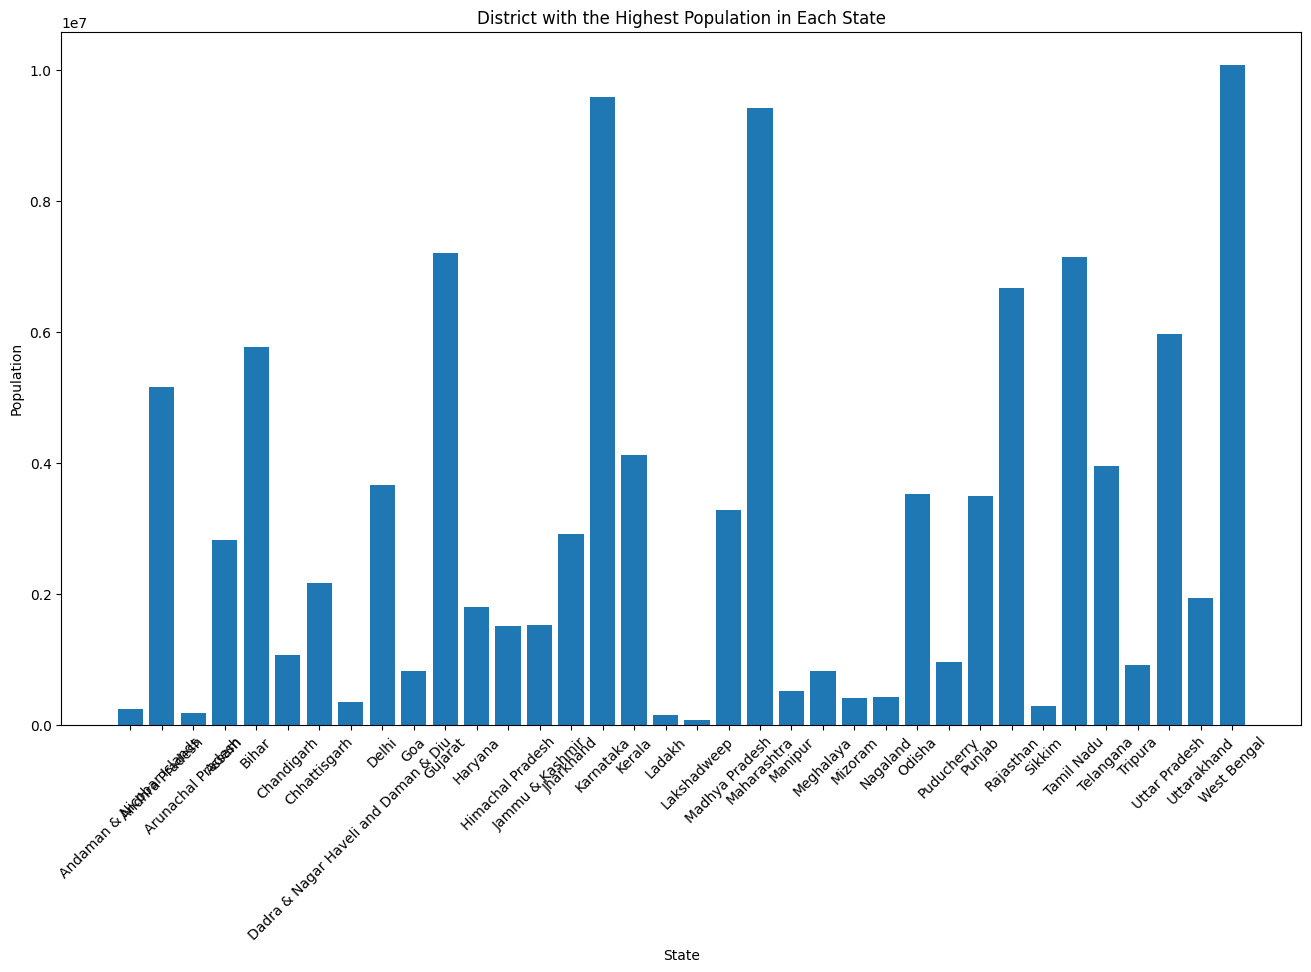

In [51]:
plt.figure(figsize = (16,9))
plt.bar(highest_population['State'],highest_population['Population'])
plt.xlabel('State')
plt.ylabel('Population')
plt.title('District with the Highest Population in Each State')
plt.xticks(rotation = 45)

## 2.5 calculate the average transaction value (atv) for each state 

 ### Average Transaction Value for Each State

In [52]:
state_wise_atv = State_Txn_and_Users.groupby('State')['ATV (INR)'].mean().reset_index()
state_wise_atv

,State,ATV (INR)
0,Andaman & Nicobar Islands,3159.27
1,Andhra Pradesh,1748.09
2,Arunachal Pradesh,2638.32
3,Assam,2008.50
4,Bihar,2023.32
5,Chandigarh,2113.80
6,Chhattisgarh,1650.82
7,Dadra & Nagar Haveli and Daman & Diu,1487.40
8,Delhi,1589.84
9,Goa,1895.26


### Top 5 state with Highest ATV and Top 5 state with Lowest ATV

In [53]:
state_wise_atv.nsmallest(5,'ATV (INR)') #lowest top 5

,State,ATV (INR)
35,West Bengal,1373.60
25,Odisha,1428.14
7,Dadra & Nagar Haveli and Daman & Diu,1487.40
20,Maharashtra,1516.36
15,Karnataka,1517.39


In [54]:
state_wise_atv.nlargest(5,'ATV (INR)') #highest top 5

,State,ATV (INR)
17,Ladakh,3408.22
0,Andaman & Nicobar Islands,3159.27
23,Mizoram,2927.52
18,Lakshadweep,2776.12
2,Arunachal Pradesh,2638.32


## 2.6 Analyze App usage trends 

### calculate the total number of app opens over the years and quarters for each state.

In [55]:
State_Txn_and_Users

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761.22,2197.62,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338535.51,2498.99,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471.13,3415.77,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336.07,3811.28,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299740.67,3355.63,18596,0
...,...,...,...,...,...,...,...,...
499,West Bengal,2020,2,57676797,100099431877.36,1735.52,13222022,198589332
500,West Bengal,2020,3,79954504,156813355855.14,1961.28,14448366,246554831
501,West Bengal,2020,4,100340645,199165491365.65,1984.89,15662093,291721919
502,West Bengal,2021,1,118254052,242937207475.52,2054.37,16808799,316832674


In [56]:
state_wise_app =  State_Txn_and_Users.groupby('State')['App Opens'].sum().reset_index()
state_wise_app

,State,App Opens
0,Andaman & Nicobar Islands,5554749
1,Andhra Pradesh,5352179585
2,Arunachal Pradesh,36738885
3,Assam,381699610
4,Bihar,2043130469
5,Chandigarh,43478444
6,Chhattisgarh,776817670
7,Dadra & Nagar Haveli and Daman & Diu,39441047
8,Delhi,1580569662
9,Goa,70152943


### creating a line plot showing the number of app opens over time for a selected state 

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Number of App Opens Over Time in West Bengal')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of App Opens')

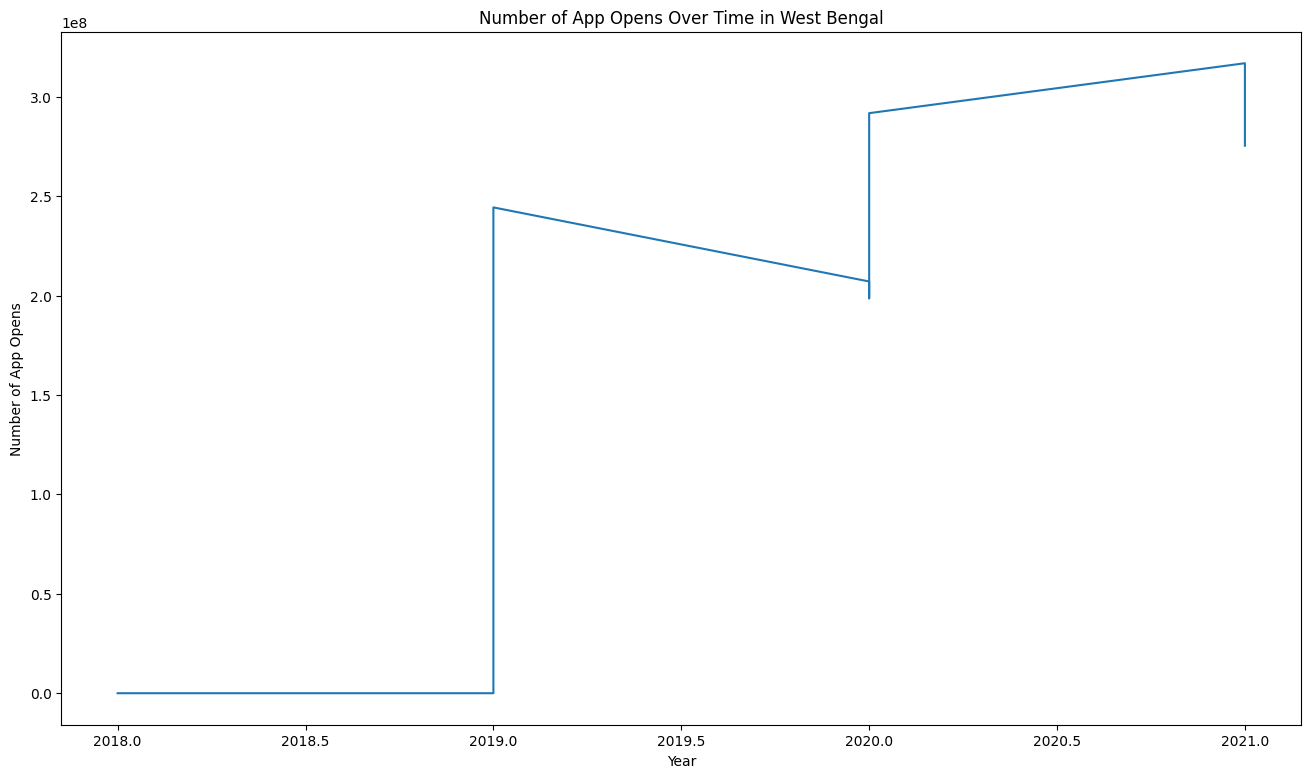

In [57]:
WB = State_Txn_and_Users[State_Txn_and_Users['State'] == 'West Bengal'] 
x_axis = WB['Year']
y_axis = WB['App Opens']
plt.figure(figsize = (16,9))
plt.plot(x_axis,y_axis)
plt.title('Number of App Opens Over Time in West Bengal')
plt.xlabel('Year')
plt.ylabel('Number of App Opens')

## 2.7 Distribution of Transaction types for each state for most recent quarters

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
60,Andaman & Nicobar Islands,2021,1,Peer-to-peer payments,105458,665391395.72,6309.54
130,Andhra Pradesh,2021,1,Peer-to-peer payments,149313738,580542193013.00,3888.07
200,Arunachal Pradesh,2021,1,Peer-to-peer payments,566209,3460488558.94,6111.68
270,Assam,2021,1,Peer-to-peer payments,9449096,45476079487.10,4812.74
340,Bihar,2021,1,Peer-to-peer payments,58566582,242013312361.31,4132.28
410,Chandigarh,2021,1,Merchant payments,1799072,1210594490.10,672.90
480,Chhattisgarh,2021,1,Peer-to-peer payments,15621154,55638916992.14,3561.77
550,Dadra & Nagar Haveli and Daman & Diu,2021,1,Peer-to-peer payments,768921,2379220756.22,3094.23
620,Delhi,2021,1,Merchant payments,72615587,39861532639.01,548.94
690,Goa,2021,1,Peer-to-peer payments,2235456,7553384653.17,3378.90


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 36 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


Text(0.5, 0, 'State')

Text(0, 0.5, 'Transaction Volume')

Text(0.5, 1.0, ' Distribution of Transaction types for each state for most recent quarters')

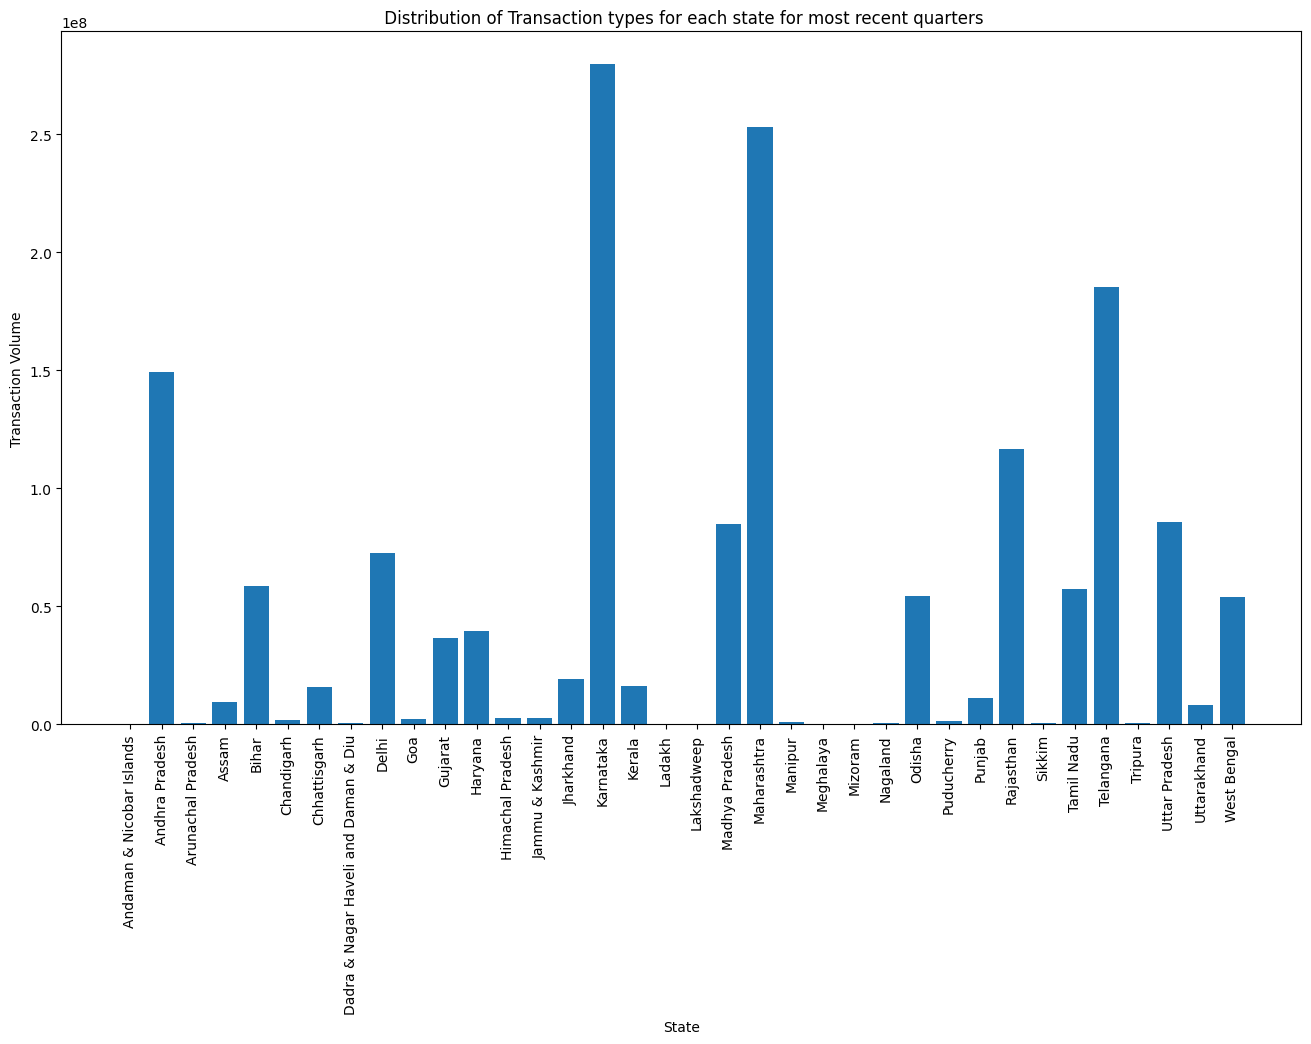

In [58]:
q1 = State_TxnSplit.groupby(['State'])['Year'].idxmax().tolist()
recent_year = State_TxnSplit.loc[q1]
q2 = recent_year.groupby('State')['Quarter'].idxmax().tolist()
recent_quarter = recent_year.loc[q2]
recent_quarter
plt.figure(figsize = (16,9))
plt.bar(recent_quarter['State'],recent_quarter['Transactions'])
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Transaction Volume')
plt.title(' Distribution of Transaction types for each state for most recent quarters')

## 2.8 Find unique mapping between district name and district code 

### unique mapping between district name and code 

In [59]:
unique_map =  District_Txn_and_Users.drop_duplicates(subset = ['District','Code'])
unique_map

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249.34,2208.20,5846,0
42,Andhra Pradesh,2018,1,Anantapur,AP01,638664,788830646.03,1235.13,241192,0
43,Andhra Pradesh,2018,1,Chittoor,AP02,830324,1009621878.09,1215.94,309541,0
...,...,...,...,...,...,...,...,...,...,...
9944,West Bengal,2018,1,Purba Bardhaman,WB19,396998,212356023.74,534.90,119528,0
9945,West Bengal,2018,1,Purba Medinipur,WB20,516243,380534345.74,737.12,131380,0
9946,West Bengal,2018,1,Purulia,WB21,234356,86934374.96,370.95,73427,0
9947,West Bengal,2018,1,South Twenty Four Parganas,WB22,421793,349206351.13,827.91,142473,0


### exporting as csv 

In [60]:
unique_map.to_csv('Unique_district_code',index = False) #exporting as csv 

In [61]:
pd.read_csv('Unique_district_code') #reading the exported file to ensure file is created properly.

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249.34,2208.20,5846,0
3,Andhra Pradesh,2018,1,Anantapur,AP01,638664,788830646.03,1235.13,241192,0
4,Andhra Pradesh,2018,1,Chittoor,AP02,830324,1009621878.09,1215.94,309541,0
...,...,...,...,...,...,...,...,...,...,...
727,West Bengal,2018,1,Purba Bardhaman,WB19,396998,212356023.74,534.90,119528,0
728,West Bengal,2018,1,Purba Medinipur,WB20,516243,380534345.74,737.12,131380,0
729,West Bengal,2018,1,Purulia,WB21,234356,86934374.96,370.95,73427,0
730,West Bengal,2018,1,South Twenty Four Parganas,WB22,421793,349206351.13,827.91,142473,0


# 3 Data Quality Checks

## Ensure data consistency across state and district levels

### for each state, calculate the total number of transactions,total transaction amount and total registered users by summing up the values from district level data 

In [62]:
District_Txn_and_Users

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139848.80,2158.80,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663.08,2107.84,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249.34,2208.20,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3072436.91,2743.25,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1317863.08,1597.41,911,0
...,...,...,...,...,...,...,...,...,...,...
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7572502416.24,1931.40,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,15155067721.27,2361.15,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2790996372.04,1472.06,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,13398529483.67,2011.24,1286588,19344293


In [63]:
district_level = District_Txn_and_Users.groupby('State').agg(
    total_transactions = ('Transactions','sum'),
    total_transactions_amount = ('Amount (INR)','sum'),
    total_registered_users = ('Registered Users','sum')
).reset_index()

In [64]:
state_level = State_Txn_and_Users.groupby('State').agg(
    total_transactions = ('Transactions','sum'),
    total_transactions_amount = ('Amount (INR)','sum'),
    total_registered_users = ('Registered Users','sum')
).reset_index()

In [65]:
district_level == state_level 
#we have inconsistency in data of total_transaction_amount

,State,total_transactions,total_transactions_amount,total_registered_users
0,True,True,False,True
1,True,True,False,True
2,True,True,False,True
3,True,True,False,True
4,True,True,False,True
5,True,True,False,True
6,True,True,False,True
7,True,True,False,True
8,True,True,False,True
9,True,True,False,True


# 4 Data Merging and Advance Analysis

## 4.1 ratio of users to population by state

In [66]:
pd.reset_option('display.float_format')

In [67]:
state_users = State_Txn_and_Users.groupby('State')['Registered Users'].sum().reset_index()
state_users

,State,Registered Users
0,Andaman & Nicobar Islands,408396
1,Andhra Pradesh,158007957
2,Arunachal Pradesh,1862214
3,Assam,26860751
4,Bihar,115284760
5,Chandigarh,3801466
6,Chhattisgarh,37448388
7,Dadra & Nagar Haveli and Daman & Diu,2701112
8,Delhi,95374654
9,Goa,4755320


In [68]:
state_population = District_Demographics.groupby('State')['Population'].sum().reset_index()
state_population

,State,Population
0,Andaman & Nicobar Islands,380581
1,Andhra Pradesh,49378776
2,Arunachal Pradesh,1606047
3,Assam,34461385
4,Bihar,103817951
5,Chandigarh,1055450
6,Chhattisgarh,25867958
7,Dadra & Nagar Haveli and Daman & Diu,586956
8,Delhi,16787941
9,Goa,1457723


In [69]:
pd.options.display.float_format = '{:.2f}'.format

In [70]:
users_population = state_users.merge(state_population,on='State',how = 'inner')
users_population['ratio'] = users_population['Registered Users']/users_population['Population']
users_population.sort_values(by = 'ratio',ascending = False)

,State,Registered Users,Population,ratio
8,Delhi,95374654,16787941,5.68
7,Dadra & Nagar Haveli and Daman & Diu,2701112,586956,4.60
31,Telangana,149224214,36366570,4.10
5,Chandigarh,3801466,1055450,3.60
15,Karnataka,203098564,60965960,3.33
11,Haryana,85564119,25855357,3.31
9,Goa,4755320,1457723,3.26
1,Andhra Pradesh,158007957,49378776,3.20
20,Maharashtra,315783658,112378989,2.81
34,Uttarakhand,23792747,10116752,2.35


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 36 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'ratio of user to population')

Text(0.5, 1.0, 'Ratio of Users to Population')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


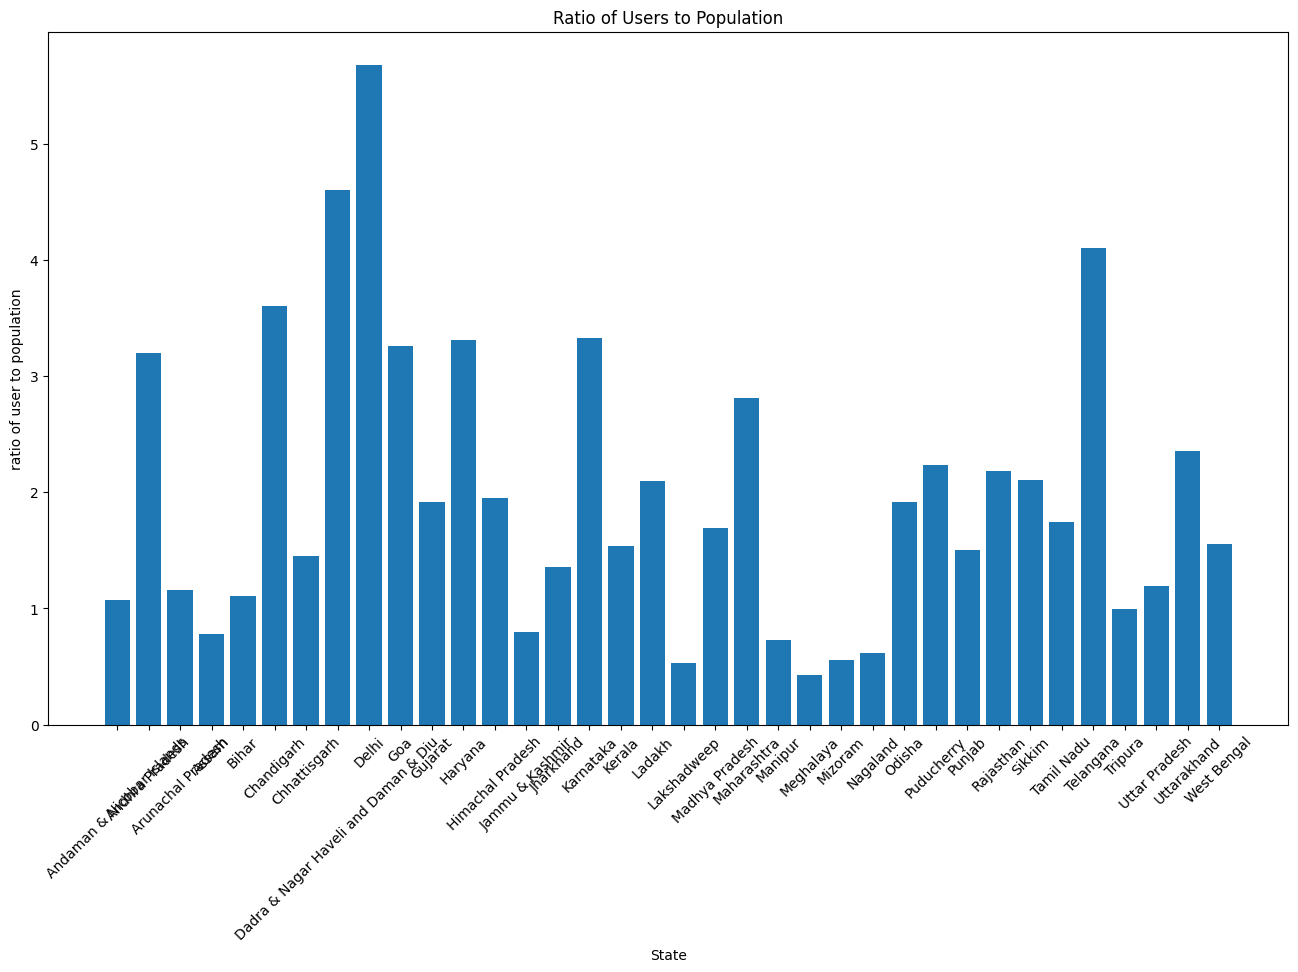

In [71]:
plt.figure(figsize = (16,9))
plt.bar(users_population['State'],users_population['ratio'])
plt.xlabel('State')
plt.ylabel('ratio of user to population')
plt.title('Ratio of Users to Population')
plt.xticks(rotation = 45)

## 4.2 Correlation Population Density with Transaction volume

In [72]:
tran = District_Txn_and_Users.groupby(['State','District'])['Transactions'].sum().reset_index()
tran

,State,District,Transactions
0,Andaman & Nicobar Islands,Nicobars,59387
1,Andaman & Nicobar Islands,North And Middle Andaman,149394
2,Andaman & Nicobar Islands,South Andaman,1014784
3,Andhra Pradesh,Anantapur,124411535
4,Andhra Pradesh,Chittoor,181284289
...,...,...,...
727,West Bengal,Purba Bardhaman,45668162
728,West Bengal,Purba Medinipur,43394953
729,West Bengal,Purulia,18265697
730,West Bengal,South Twenty Four Parganas,44715760


In [73]:
den = District_Demographics.groupby(['State','District'])['Density'].sum().reset_index()
den

,State,District,Density
0,Andaman & Nicobar Islands,Nicobar,20
1,Andaman & Nicobar Islands,North and Middle Andaman,28
2,Andaman & Nicobar Islands,South Andaman,89
3,Andhra Pradesh,Anantapur,213
4,Andhra Pradesh,Chittoor,275
...,...,...,...
737,West Bengal,Purba Bardhaman,890
738,West Bengal,Purba Medinipur,1076
739,West Bengal,Purulia,468
740,West Bengal,South 24 Parganas,819


In [74]:
den_tran = den.merge(tran,on = ['State','District'],how = 'left').fillna(0)
den_tran

,State,District,Density,Transactions
0,Andaman & Nicobar Islands,Nicobar,20,0.00
1,Andaman & Nicobar Islands,North and Middle Andaman,28,0.00
2,Andaman & Nicobar Islands,South Andaman,89,1014784.00
3,Andhra Pradesh,Anantapur,213,124411535.00
4,Andhra Pradesh,Chittoor,275,181284289.00
...,...,...,...,...
737,West Bengal,Purba Bardhaman,890,45668162.00
738,West Bengal,Purba Medinipur,1076,43394953.00
739,West Bengal,Purulia,468,18265697.00
740,West Bengal,South 24 Parganas,819,0.00


In [75]:
den_tran['Density'].corr(den_tran['Transactions']).round(2)
#neither stong nor weak correlation 

np.float64(0.18)

<Figure size 1600x900 with 0 Axes>

Text(0.5, 0, 'Density')

Text(0, 0.5, 'Transactions')

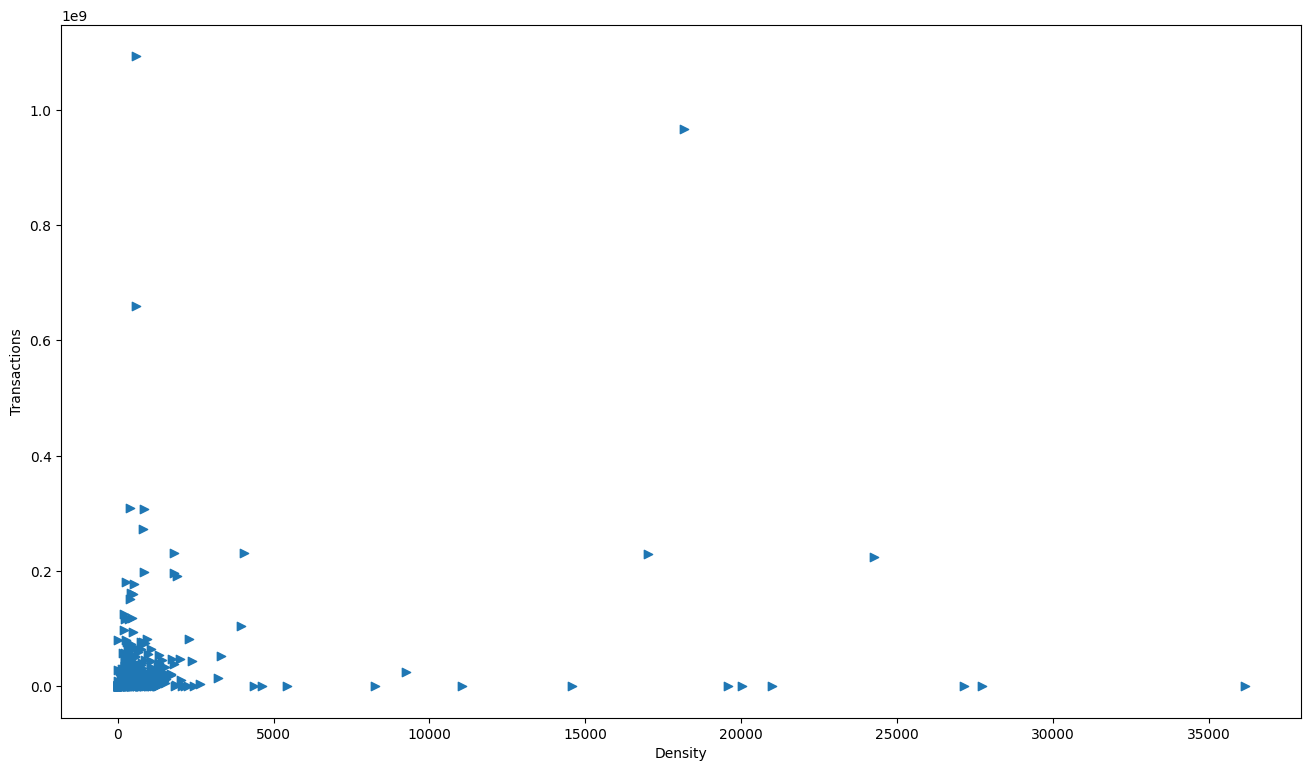

In [76]:
plt.figure(figsize = (16,9))
plt.scatter(den_tran['Density'],den_tran['Transactions'],marker = '>')
plt.xlabel('Density')
plt.ylabel('Transactions')


## 4.3 Average Transaction amount per User

### 1.calculating Avg amount per Users

In [77]:
avg_users =  State_Txn_and_Users.groupby('State')[['Amount (INR)','Registered Users']].sum().reset_index()
avg_users

,State,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,3641817860.75,408396
1,Andhra Pradesh,3198363522865.60,158007957
2,Arunachal Pradesh,22251830956.91,1862214
3,Assam,281408712657.44,26860751
4,Bihar,1639578926751.51,115284760
5,Chandigarh,53712084630.82,3801466
6,Chhattisgarh,415635319208.15,37448388
7,Dadra & Nagar Haveli and Daman & Diu,18658784568.34,2701112
8,Delhi,1649942211116.08,95374654
9,Goa,44271871113.09,4755320


In [78]:
avg_users['avg_per_user'] = avg_users['Amount (INR)']/avg_users['Registered Users']

In [79]:
avg_users.sort_values(by = 'avg_per_user')

,State,Amount (INR),Registered Users,avg_per_user
18,Lakshadweep,192158684.67,34223,5614.90
32,Tripura,20970514761.53,3661575,5727.18
7,Dadra & Nagar Haveli and Daman & Diu,18658784568.34,2701112,6907.82
16,Kerala,372959870819.69,51267042,7274.85
12,Himachal Pradesh,97865455329.56,13373980,7317.60
27,Punjab,394177285102.20,45811761,8604.28
22,Meghalaya,12541621895.08,1436472,8730.85
10,Gujarat,1105328681946.77,126380032,8746.07
0,Andaman & Nicobar Islands,3641817860.75,408396,8917.37
34,Uttarakhand,215071471849.20,23792747,9039.37


### 2. identify top 5 and lowest 5 Avg Transaction Amount per User

In [80]:
avg_users.nsmallest(5,'avg_per_user')

,State,Amount (INR),Registered Users,avg_per_user
18,Lakshadweep,192158684.67,34223,5614.90
32,Tripura,20970514761.53,3661575,5727.18
7,Dadra & Nagar Haveli and Daman & Diu,18658784568.34,2701112,6907.82
16,Kerala,372959870819.69,51267042,7274.85
12,Himachal Pradesh,97865455329.56,13373980,7317.60


In [81]:
avg_users.nlargest(5,'avg_per_user')

,State,Amount (INR),Registered Users,avg_per_user
31,Telangana,4574245879737.88,149224214,30653.51
15,Karnataka,4361395878908.12,203098564,21474.28
1,Andhra Pradesh,3198363522865.60,158007957,20241.79
28,Rajasthan,2625584351280.98,149770064,17530.77
8,Delhi,1649942211116.08,95374654,17299.59


## 4.4 Device Brand Usage Ratio

### merging the State_Txn_and_Users with  State_DeviceData

In [82]:
state_users = State_Txn_and_Users.groupby('State')['Registered Users'].sum().reset_index()

In [83]:
device_users = State_DeviceData.groupby(['State','Brand'])['Registered Users'].sum().reset_index()

In [84]:
usr = device_users.merge(state_users,on='State',how = 'left')
usr

,State,Brand,Registered Users_x,Registered Users_y
0,Andaman & Nicobar Islands,Apple,9334,408396
1,Andaman & Nicobar Islands,Huawei,11497,408396
2,Andaman & Nicobar Islands,Lenovo,5362,408396
3,Andaman & Nicobar Islands,Motorola,9491,408396
4,Andaman & Nicobar Islands,OnePlus,15397,408396
...,...,...,...,...
443,West Bengal,Others,17526532,144242183
444,West Bengal,Realme,9322038,144242183
445,West Bengal,Samsung,30516315,144242183
446,West Bengal,Vivo,18755122,144242183


### calculating the ratio of users using each device brand to the total number of registered users in each state.

In [85]:
usr['ratio'] = usr['Registered Users_x']/usr['Registered Users_y']
usr

,State,Brand,Registered Users_x,Registered Users_y,ratio
0,Andaman & Nicobar Islands,Apple,9334,408396,0.02
1,Andaman & Nicobar Islands,Huawei,11497,408396,0.03
2,Andaman & Nicobar Islands,Lenovo,5362,408396,0.01
3,Andaman & Nicobar Islands,Motorola,9491,408396,0.02
4,Andaman & Nicobar Islands,OnePlus,15397,408396,0.04
...,...,...,...,...,...
443,West Bengal,Others,17526532,144242183,0.12
444,West Bengal,Realme,9322038,144242183,0.06
445,West Bengal,Samsung,30516315,144242183,0.21
446,West Bengal,Vivo,18755122,144242183,0.13


In [86]:
usr.nlargest(5,'ratio')
usr.nsmallest(5,'ratio')

,State,Brand,Registered Users_x,Registered Users_y,ratio
268,Manipur,Xiaomi,1079740,2317734,0.47
168,Jammu & Kashmir,Xiaomi,3471820,9756438,0.36
293,Mizoram,Xiaomi,193013,605612,0.32
368,Sikkim,Samsung,406392,1279199,0.32
306,Nagaland,Xiaomi,440693,1440387,0.31


,State,Brand,Registered Users_x,Registered Users_y,ratio
358,Sikkim,Asus,308,1279199,0.00
218,Lakshadweep,COOLPAD,10,34223,0.00
275,Meghalaya,OnePlus,435,1436472,0.00
307,Odisha,Apple,24617,80404103,0.00
89,Dadra & Nagar Haveli and Daman & Diu,Micromax,847,2701112,0.00


### Bar chart depicting the device brand usage ratio for each state

In [87]:
top_5_state = usr.sort_values(by = 'ratio').nlargest(5,'ratio')
top_5_state

,State,Brand,Registered Users_x,Registered Users_y,ratio
268,Manipur,Xiaomi,1079740,2317734,0.47
168,Jammu & Kashmir,Xiaomi,3471820,9756438,0.36
293,Mizoram,Xiaomi,193013,605612,0.32
368,Sikkim,Samsung,406392,1279199,0.32
306,Nagaland,Xiaomi,440693,1440387,0.31


['Manipur', 'Jammu & Kashmir', 'Mizoram', 'Sikkim', 'Nagaland']

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 448 artists>

Text(0.5, 1.0, 'Manipur')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 448 artists>

Text(0.5, 1.0, 'Jammu & Kashmir')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 448 artists>

Text(0.5, 1.0, 'Mizoram')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 448 artists>

Text(0.5, 1.0, 'Sikkim')

<Figure size 1600x900 with 0 Axes>

<BarContainer object of 448 artists>

Text(0.5, 1.0, 'Nagaland')

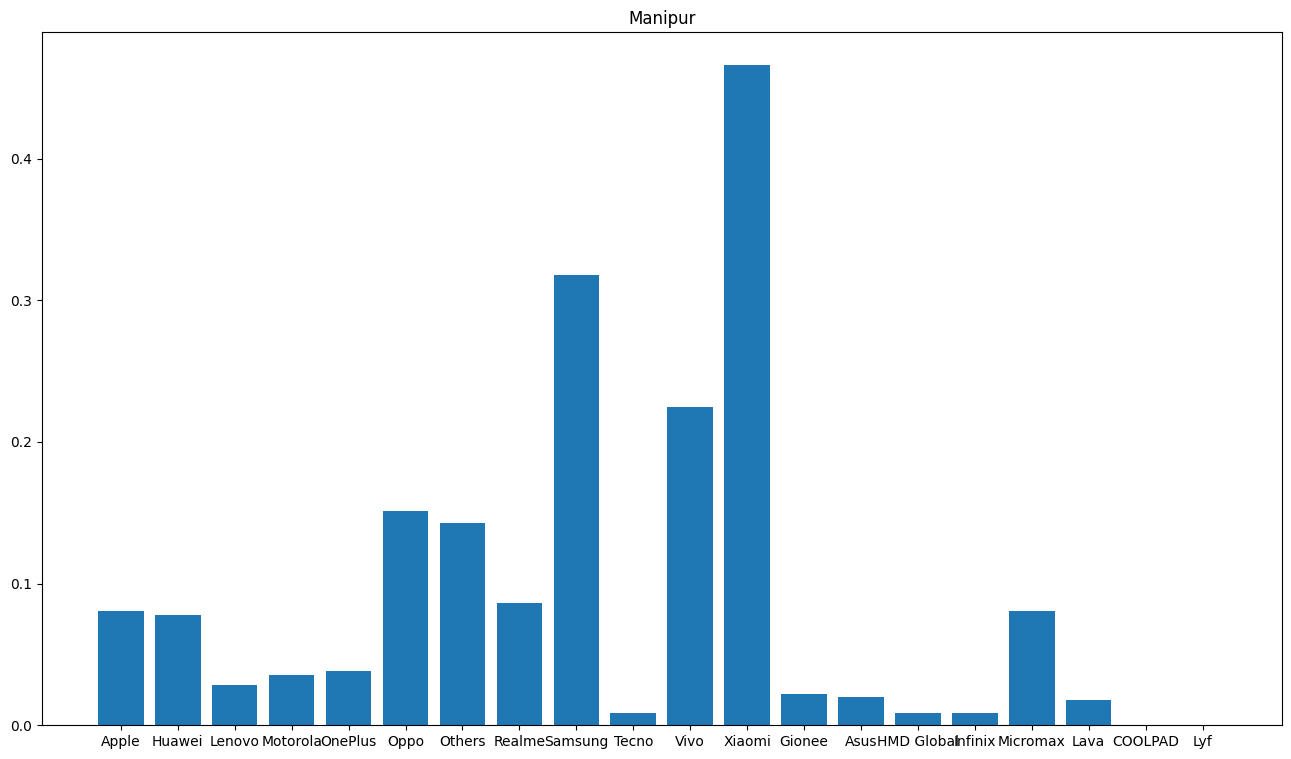

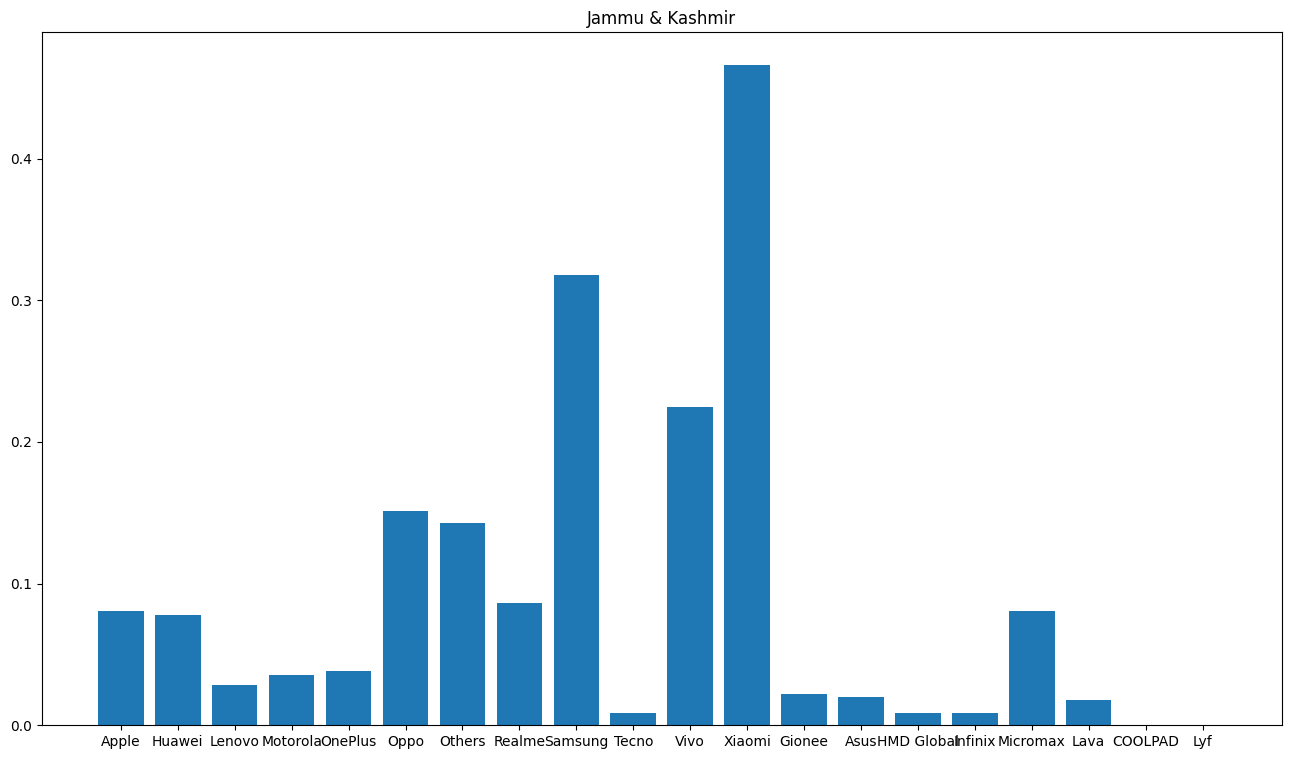

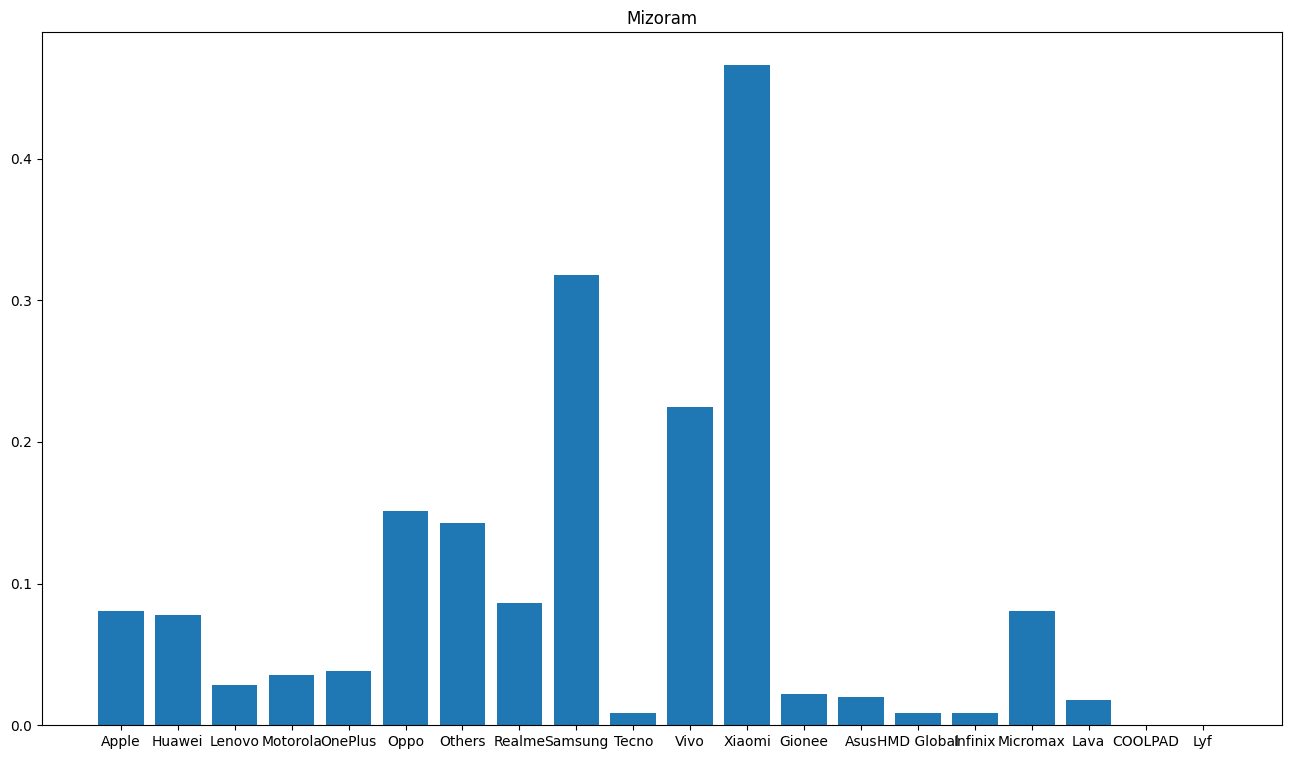

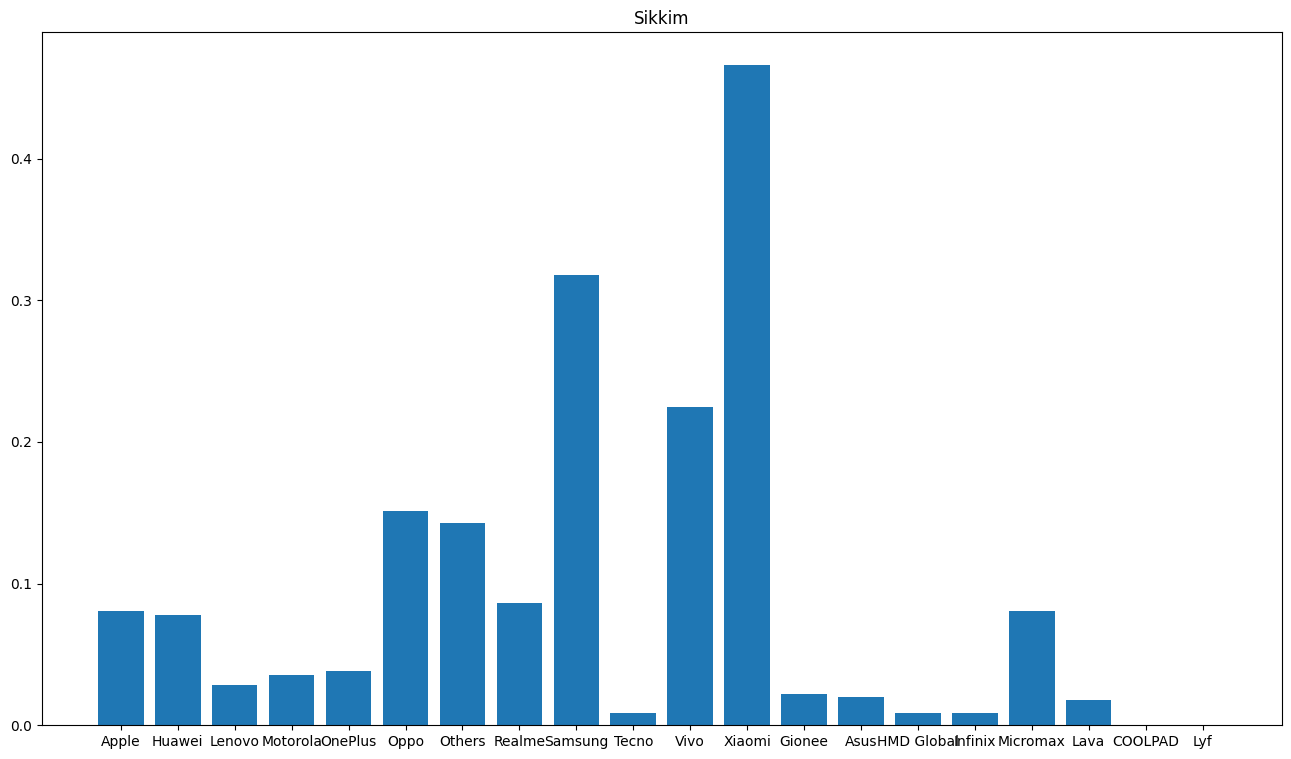

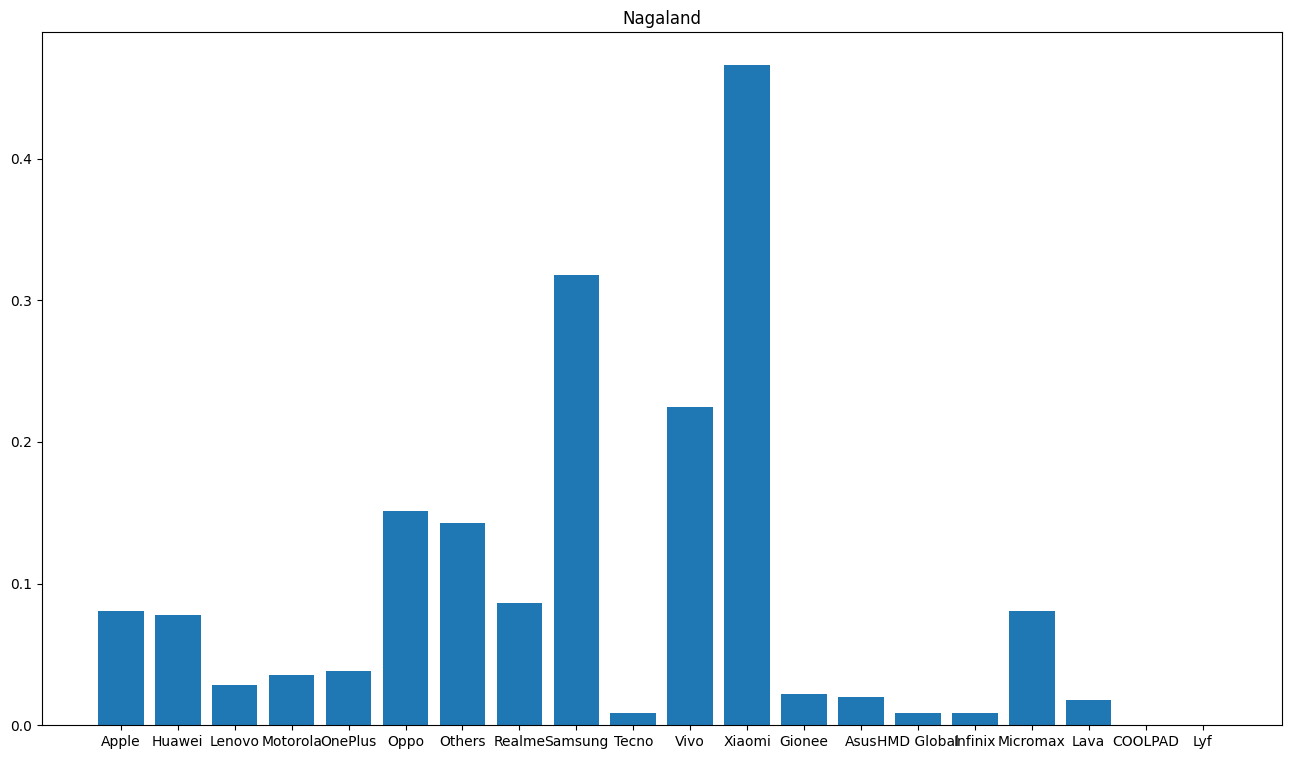

In [88]:
top_states = top_5_state['State'].unique().tolist()
top_states
for state in top_states:
    plt.figure(figsize = (16,9))
    plt.bar(usr['Brand'],usr['ratio'])
    plt.title(state)

# 5 Data Visualization

## 5.1 line plot showing the total number of transactions and total number of amount over time for a selected state 

In [89]:
har = State_Txn_and_Users[State_Txn_and_Users['State'] == 'Haryana']
har['time'] = har['Year'].astype('str')+'  Q'+har['Quarter'].astype('str')
har

C:\Users\Sumit Mishra\AppData\Local\Temp\ipykernel_17004\290046244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  har['time'] = har['Year'].astype('str')+'  Q'+har['Quarter'].astype('str')


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,time
154,Haryana,2018,1,4480770,6793511514.66,1516.15,1847357,0,2018 Q1
155,Haryana,2018,2,6150931,11320414442.12,1840.44,2447221,0,2018 Q2
156,Haryana,2018,3,8262024,16375139007.63,1981.98,3020398,0,2018 Q3
157,Haryana,2018,4,12950183,25390876016.46,1960.66,3793079,0,2018 Q4
158,Haryana,2019,1,22135775,34051655721.63,1538.31,4538767,0,2019 Q1
159,Haryana,2019,2,22741816,42501539813.22,1868.87,5178030,31929195,2019 Q2
160,Haryana,2019,3,30343531,52489119199.44,1729.83,5783752,118332587,2019 Q3
161,Haryana,2019,4,37825985,69359719869.10,1833.65,6366679,136721888,2019 Q4
162,Haryana,2020,1,44036087,81976214558.24,1861.57,7018770,157793468,2020 Q1
163,Haryana,2020,2,41781050,80711264923.94,1931.77,7682878,143650123,2020 Q2


<Figure size 1600x900 with 0 Axes>

Text(0.5, 0, 'Time (Year and Quarter)')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Total Amount over time')

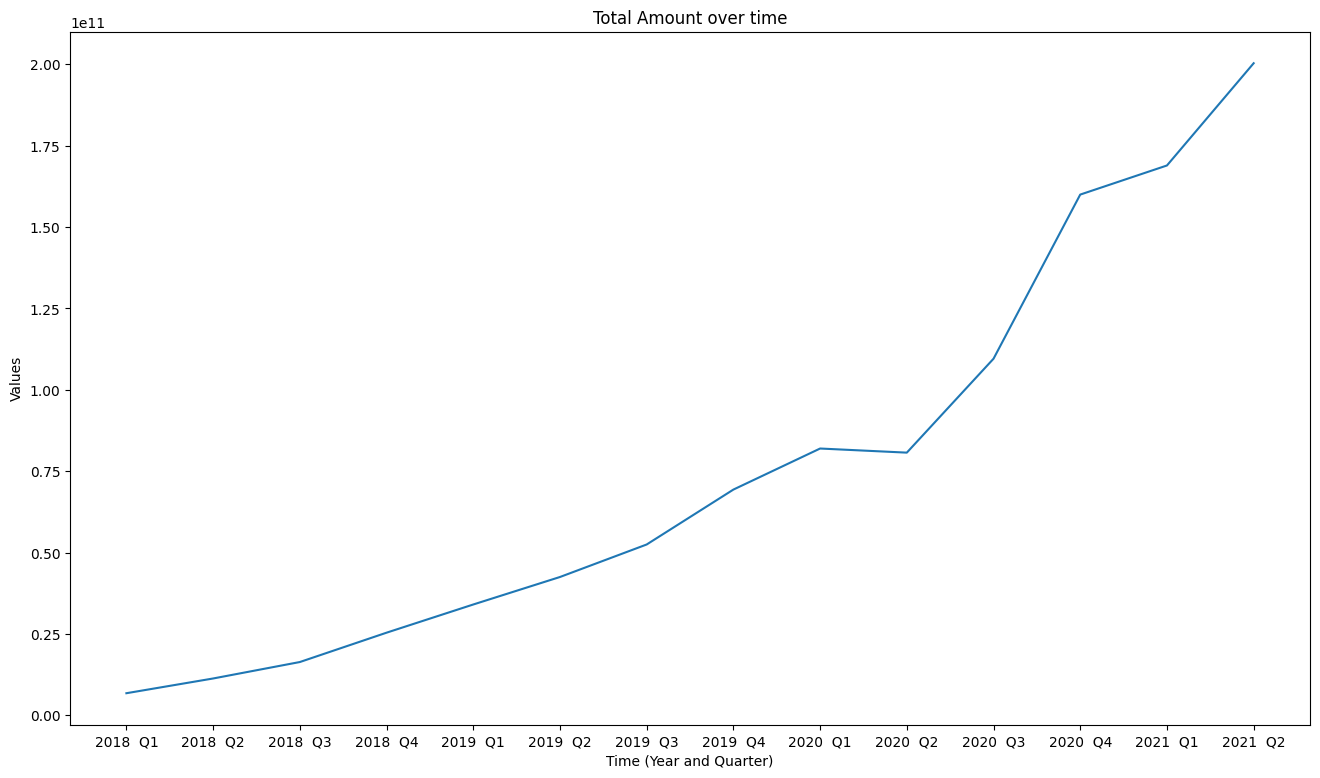

In [90]:
plt.figure(figsize = (16,9))
plt.plot(har['time'],har['Amount (INR)'])
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Values')
plt.title('Total Amount over time')

<Figure size 1600x900 with 0 Axes>

Text(0.5, 0, 'Time (Year and Quarter)')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Total Transactions over time')

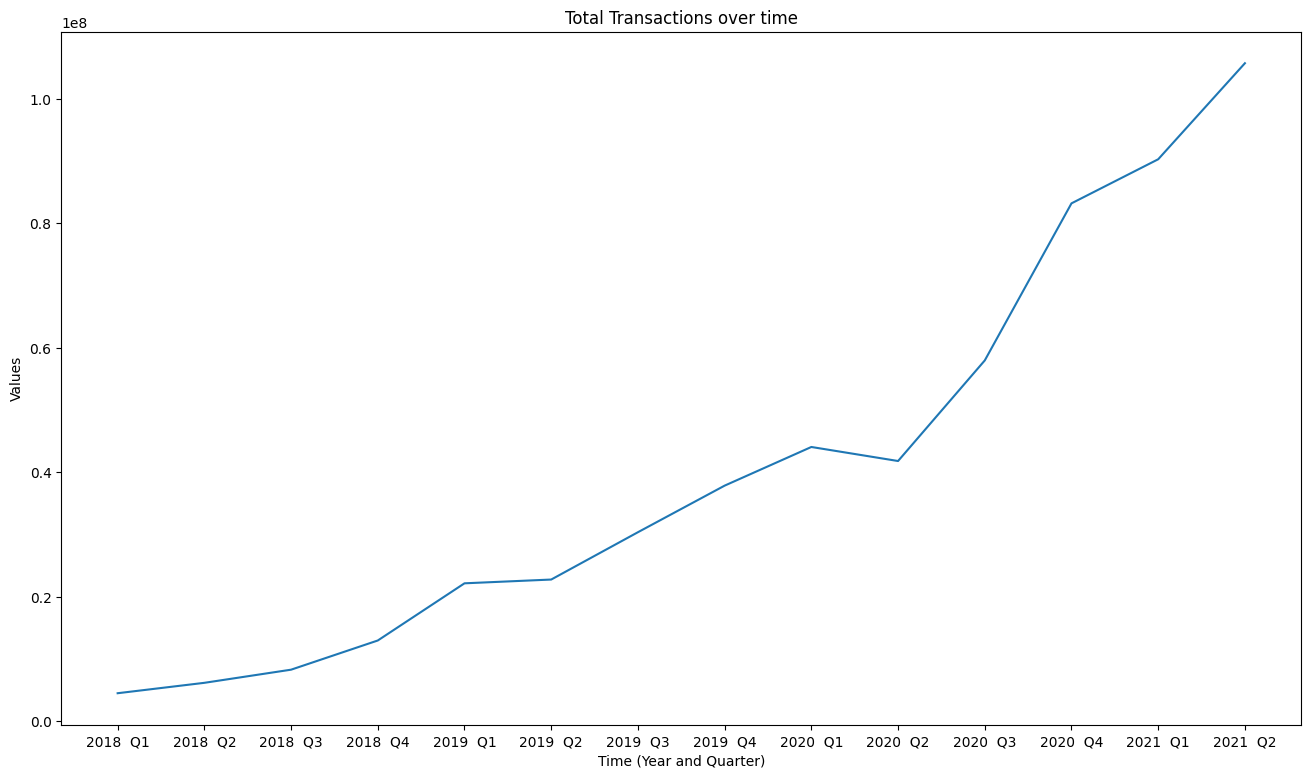

In [91]:
plt.figure(figsize = (16,9))
plt.plot(har['time'],har['Transactions'])
plt.xlabel('Time (Year and Quarter)')
plt.ylabel('Values')
plt.title('Total Transactions over time')

## 5.2 Pie chart showing the distribution of transaction type for a specific Quarter

In [92]:
p = State_TxnSplit[(State_TxnSplit['State'] == 'West Bengal') & (State_TxnSplit['Quarter'] == 2) & (State_TxnSplit['Year'] == 2018)]
p

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2449,West Bengal,2018,2,Peer-to-peer payments,8284944,15889890046.86,1917.92
2450,West Bengal,2018,2,Recharge & bill payments,7360522,1563841173.84,212.46
2451,West Bengal,2018,2,Financial Services,1121570,160809685.94,143.38
2452,West Bengal,2018,2,Merchant payments,937608,715914360.82,763.55
2453,West Bengal,2018,2,Others,377802,298728202.74,790.70


([<matplotlib.patches.Wedge at 0x16a6eec6ab0>,
 [Text(0.14411760243705476, 1.090518278924198, 'Peer-to-peer payments'),
  Text(-0.5794390687380175, -0.9350135644042921, 'Recharge & bill payments'),
  Text(0.8744059507613805, -0.6673936119510632, 'Financial Services'),
  Text(1.0527463095772662, -0.3189438942376022, 'Merchant payments'),
  Text(1.097631233252383, -0.07215036929117426, 'Others')],
 [Text(0.0786096013293026, 0.5948281521404716, '45.8%'),
  Text(-0.31605767385710043, -0.5100073987659774, '40.7%'),
  Text(0.4769487004152984, -0.3640328792460344, '6.2%'),
  Text(0.5742252597694179, -0.1739693968568739, '5.2%'),
  Text(0.5987079454103906, -0.03935474688609504, '2.1%')])

Text(0.5, 1.0, 'Transaction Type Distribution for West Bengal(Quarter 2)')

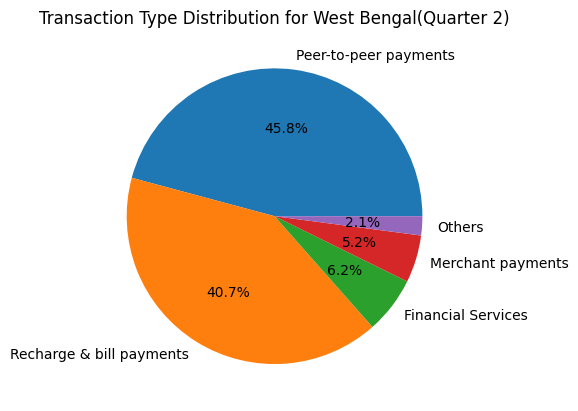

In [93]:
plt.pie(p['Transactions'],labels = p['Transaction Type'],autopct='%1.1f%%')
plt.title('Transaction Type Distribution for West Bengal(Quarter 2)')

## 5.3 Visualize the Population Density of a District in a selected State

In [94]:
den = District_Demographics[District_Demographics['State'] == 'Andhra Pradesh']
den

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.00,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.00,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.00,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.00,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.00,188,AP13,YSR
5,Andhra Pradesh,Krishna,Machilipatnam,4529009,8727.00,519,AP05,Krishna
6,Andhra Pradesh,Kurnool,Kurnool,4046601,17658.00,229,AP06,Kurnool
7,Andhra Pradesh,Prakasam,Ongole,3392764,17626.00,192,AP07,Prakasam
8,Andhra Pradesh,Sri Potti Sriramulu Nellore,Nellore,2966082,13076.00,227,AP08,Spsr Nellore
9,Andhra Pradesh,Srikakulam,Srikakulam,2699471,5837.00,462,AP09,Srikakulam


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 13 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Anantapur'),
  Text(1, 0, 'Chittoor'),
  Text(2, 0, 'East Godavari'),
  Text(3, 0, 'Guntur'),
  Text(4, 0, 'YSR'),
  Text(5, 0, 'Krishna'),
  Text(6, 0, 'Kurnool'),
  Text(7, 0, 'Prakasam'),
  Text(8, 0, 'Sri Potti Sriramulu Nellore'),
  Text(9, 0, 'Srikakulam'),
  Text(10, 0, 'Visakhapatnam'),
  Text(11, 0, 'Vizianagaram'),
  Text(12, 0, 'West Godavari')])

Text(0.5, 0, 'District')

Text(0, 0.5, 'Population Density')

Text(0.5, 1.0, 'Population Density of District of Andhra Pradesh')

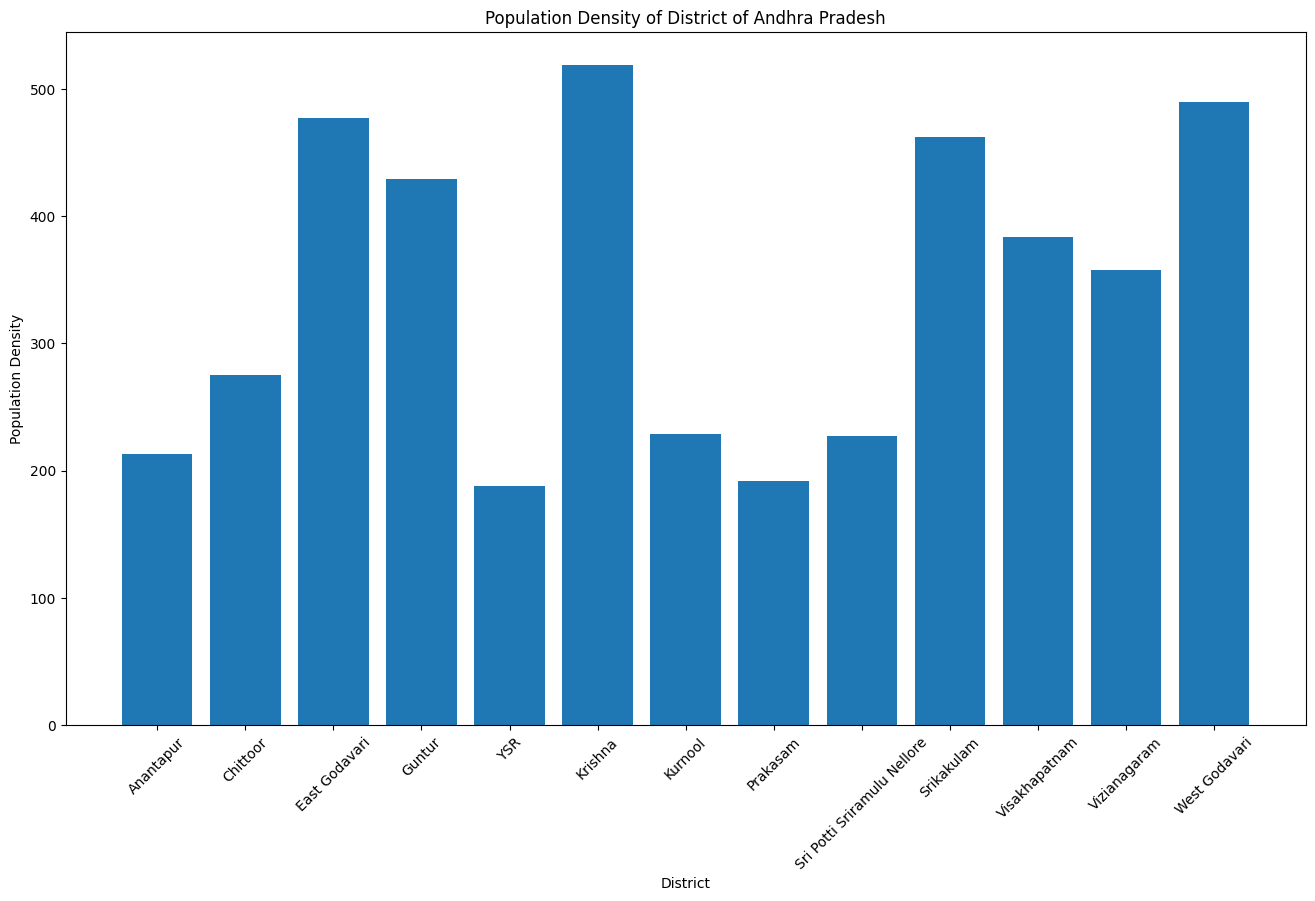

In [95]:
plt.figure(figsize = (16,9))
plt.bar(den['District'],den['Density'])
plt.xticks(rotation = 45)
plt.xlabel('District')
plt.ylabel('Population Density')
plt.title('Population Density of District of Andhra Pradesh')

# 6 Insights and Conclusion

## 6.1 identify any trends or patterns in the Transaction Data 

In [96]:
td = State_Txn_and_Users.groupby('Year')[['Transactions','Amount (INR)']].sum().reset_index()
td

,Year,Transactions,Amount (INR)
0,2018,1080202410,1623045396413.89
1,2019,4079827215,6276688133188.92
2,2020,7973974741,14641161978060.85
3,2021,7398955928,13098780808949.80


Text(0.5, 0, 'Year')

Text(0, 0.5, 'total number of Transactions')

Text(0.5, 1.0, 'total number of Transactions over time')

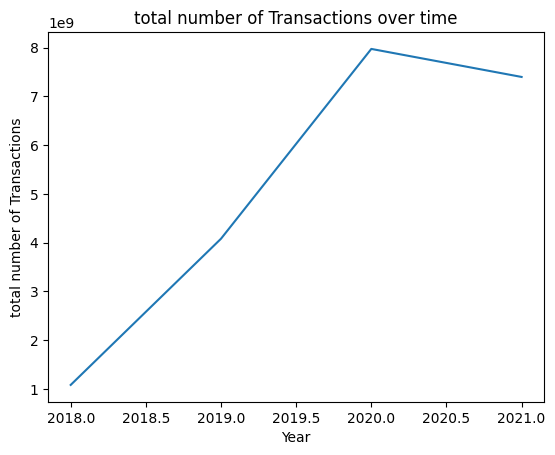

In [97]:
plt.plot(td['Year'],td['Transactions'])
plt.xlabel('Year')
plt.ylabel('total number of Transactions')
plt.title('total number of Transactions over time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Total Amount')

Text(0.5, 1.0, 'Total  Amount over time')

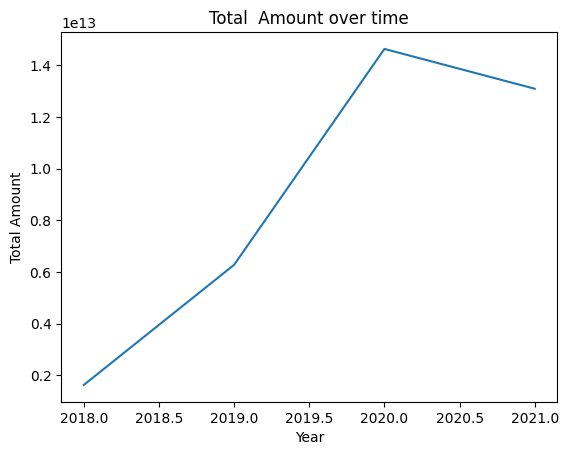

In [98]:
plt.plot(td['Year'],td['Amount (INR)'])
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total  Amount over time')

#### in both column that is total transactions and total amount over the yaer from 2018 to 2021 , there is a continuous increase till 2020 and after year 2020, there is a decrease in trend. 

## 6.2 Correlate Demographic Data with the Transaction Data 

In [99]:
state_t = State_Txn_and_Users.groupby('State')['Transactions'].sum().reset_index()

In [100]:
district_d = District_Demographics.groupby('State')['Density'].sum().reset_index()

In [101]:
tran_den = state_t.merge(district_d,on='State',how='inner')

In [102]:
tran_den['Transactions'].corr(tran_den['Density']).round(2)

np.float64(0.4)

#### - as we got the correlation value as 0.4,so we can say that these columns indicates moderate positive relationship 
#### - the relationship is neither weak nor strong 
#### - but it is not strong enough to be highly predictive 

## 6.3 Summarize finding and insights

#### - we have some brand like apple , asus , oneplus which has register user ratio to the total user less than 0.1  so we should give user some special offer like voucher , cashback scheme to that particular brand to make them register to app 

#### - ['Karnataka', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Rajasthan'] #top 5 with highest transaction volume
#### - ['Lakshadweep', 'Andaman & Nicobar Islands', 'Ladakh', 'Mizoram', 'Meghalaya'] #top 5 with lowest transaction volume
#### so the state with the lowest transaction , we can look for the main reason why they are not doing transactions with the app ... it can be possible may be other app giving some offer that we are not giving so we can give some offers like discount on bookings , coupons, cashback etc to make user to use app.

#### - we also analysed that peer to peer payments and recharge & bill payments are mostly done on our app.
#### so to make user to do other transactions also we should introduce some offers for users so that they use application for other transactions too.

#### - we have calculated correlation between density and transactions and we got value less then 0.5 so we can say there is neither strong nor weak correlation so transaction volume doesn't depend on density that population over area.

#### - we also analyzed that the most common transaction types are Peer-to-peer payments,Recharge & bill payments,Merchant payments across all states over the years so to make users use other transaction types also we should give them some offer like by using all transaction type in given period of time user will get some discount or special coupons etc.   